In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Palmer Penguins: a machine learning example

![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/logo.png)

## About the data
The data was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antartica LTER. The goal of the dataset is to provide a great dataset for data exploration, visualisation and - in this case - a demonstration of the scikit-learn API. 

## Scikit-Learn
Scikit-learn is *the* library for machine learning in Python. You could consider it the swiss army knife of machine learning. A wide variety of machine learning models are implemented by the community and core developers, with a consistent API. Once you master this API, it's easy to apply a wide variety of machine learning algorithms, and you have a handy tool to help you out with preprocessing, model evaluation and model selection. 

#### Why scikit-learn?
- Many available machine learning models
- Models are implemented by an expert team and checked by a large community
- Covers most machine-learning tasks
- Commitment to documentation, consistency and usability
- Designed to work with other key Python libraries (NumPy, Pandas etc)


## Penguin classification
In this notebook, we will demonstrate classification of penguins species based on bodily measurements with the scikit-learn API. We will cover the following aspects:

1. Loading the data
2. Preparing the data for sklearn
3. Model creation & evaluation
4. Model visualisation 

## 1. Loading our data

There are many places your data can originate from. Maybe you want to load it from a Excel file you have stored locally on your system, maybe you have a .csv file stored online somewhere. Scikit-learn comes with various standard datasets that can be used for practice, that can be loaded if you have scikit-learn installed on your system. 

However, the dataset we will be using today (the Palmer penguins dataset) does not come from scikit-learn, but from a visualisation package called `seaborn`. A dataset loaded from seaborn will be a Pandas dataframe and can be used as such. Pandas is a powerful library for data wrangling.

In [5]:
data = sns.load_dataset('penguins')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 2. Preparing the data for scikit-learn

The first thing we might notice here is that there are some data point entries that have no value - the value simply says `NaN`. This means this information is missing. 

Unfortunately, that also means the information cannot be used as is to create a machine learning model with scikit-learn. We must find a way to deal with the missing values. 

There are multiple strategies for dealing with missing data. For example, you could replace a missing values with the mean of the column. E.g. if for a particular penguin the value for body mass is missing, you could replace the NaN with the mean recorded body mass of all penguins. 

Scikit-learn even provides us with a great interface to apply such transformations. For the moment, however, we simply choose to discard all the incomplete data points with pandas `.dropna()` functionality. 

In [8]:
data = data.dropna()

Second of all, we notice that we have more information than the features discussed earlier: _bill length, bill depth, flipper length_ and _body mass_. 

Although we could incorporate this extra information (sex of the penguin and the island where the penguin was spotted), this requires some extra preprocessing outside of the scope of this notebook. We choose to focus on our four discussed features first.

We use our knowledge of Pandas to create our feature matrix *X* and target vector *y*.

In [42]:
feature_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

X = data.loc[:, feature_columns]
y = data.loc[:, 'species']

print(f'The shape of feature matrix X is: {X.shape}')
print(f'The shape of target vector y is: {y.shape}')

The shape of feature matrix X is: (333, 4)
The shape of target vector y is: (333,)


In [35]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,Male
1,39.5,17.4,186.0,3800.0,Female
2,40.3,18.0,195.0,3250.0,Female
4,36.7,19.3,193.0,3450.0,Female
5,39.3,20.6,190.0,3650.0,Male


In [36]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

### Splitting the dataset
An important goal of machine learning is to create a model that does not only do well on the data that it has already seen, but will also perform well under new circumstances on data that is has not seen before. We call this _generalization_. 

Imagine this: Penguin A is a gentoo (bill length of 33, bill depth of of 16, flipper length of 180 and body mass of 3500 grams).   Penguin A was presented during the training of our model; that means, penguin A was one of the examples that the algorithm used to create an understanding of what a gentoo looks like and how you can distinguish it from a chinstrap or adélie. 

If we want to know how well our model does, asking the model to classify our penguin A does not give us a lot of information. Even if the model is correct, do we know whether it has really truly learned the relationship between the features and the targets (ie. flipper length of >X is always species Y), or has it simply memorized the original data and does it recognise penguin A from the training phase? 

That's why we want to separate our dataset into two parts:
* The _training_ set: this is the data (features and targets) that will guide the learning process. 
* The _test_ set: this is the data (features and targets) that we will use to _evaluate_ how well our model has learned. 

Scikit-learn's `train_test_split` function allows us to split the data in a train- and testset. By default, the test set size is set to 25% and the data is shuffled. 

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(f'The size of our feature matrix for the train set is: {X_train.shape}')
print(f'The size of our target vector for the train set is: {y_train.shape}')

print(f'\nThe size of our feature matrix for the test set is: {X_test.shape}')
print(f'The size of our target vector for the test set is: {y_test.shape}')

The size of our feature matrix for the train set is: (233, 4)
The size of our target vector for the train set is: (233,)

The size of our feature matrix for the test set is: (100, 4)
The size of our target vector for the test set is: (100,)


Let's see if our data is in fact shuffled: 

In [38]:
y_test.values

array(['Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Ad

## 3. Model creation and evaluation

Now we're ready to create our machine learning model! 

Scikit-learn has a rich collection of algorithms readily available. Depending on the case you are working on, scikit-learn most likely has a model that will suit your purposes. 

#### Scikit-Learn API usage steps when training a model
1. Choosing a model class and importing that model 
2. Choosing the model hyperparameters by instantiating this class with desired values.
3. Training the model to the preprocessed train data by calling the `fit()` method of the model instance.
4. Evaluating model's performance using available metrics

In [39]:
# Step 1: import the chosen algorithm 
from sklearn.tree import DecisionTreeClassifier

In [56]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [52]:
# Step 2: instantiate the model with the chosen hyperparameters
model = DecisionTreeClassifier(max_depth=2)

In [53]:
# Step 3: train the model with the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

We have now trained a model that can be used to make predictions on new data. Remember our test set? That's new, unseen data to the model that we can now create predictions on. 

In [54]:
y_pred = model.predict(X_test)
y_pred[0:10]

array(['Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

We can compare these predictions against our original data to see how well our model does. 

In [55]:
y_test[0:10].values

array(['Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

Fortunately, we don't have to do that comparison ourselves. Scikit-learn has made many implementations of possible metrics readily available, such as accuracy. 

$\text{accuracy} = \frac{correct}{total}$

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.95

Pretty good! 

But accuracy is not the only metric you could be interested in. Alternatives are, for example, _precision_ and _recall_. 

* _Precision_ is the proportion of positive identifications that was actually correct. 
* _Recall_ is the proportion of actual positives that was identified correctly.
* _F1 score_ is a function of precision and recall, that you use when you seek a balance between precision and recall. 

A simple example is this: 
Let's say you create a model that should classify email messages as spam or not spam. _Precision_ measures the percentage of emails flagged as spam that were correctly classified, while _recall_ measures the percentage of actual spam emails that were correctly classified. 

In some cases, precision is more important. For YouTube's recommendation system for example: you won't be able to show _ALL_ relevant videos, but it is important that the ones you do show _are_ relevant. 

However, in medical context, _recall_ is often more important. After all, if we mistakingly tell a person with cancer that they're healthy, that can have more severe consequences than the other way around. 

Precision, recall and F1 are also all available with scikit-learn.

In [30]:
from sklearn.metrics import classification_report

report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        43
   Chinstrap       1.00      0.79      0.88        19
      Gentoo       1.00      0.97      0.99        38

    accuracy                           0.95       100
   macro avg       0.97      0.92      0.94       100
weighted avg       0.96      0.95      0.95       100



## Model Visualisation

One of the advantages of decision trees over some of the other available models, is that decision trees are relatively easy to interpret. By visualising the tree-like structure of the decision tree, we can understand why the model classifies samples the way it does.

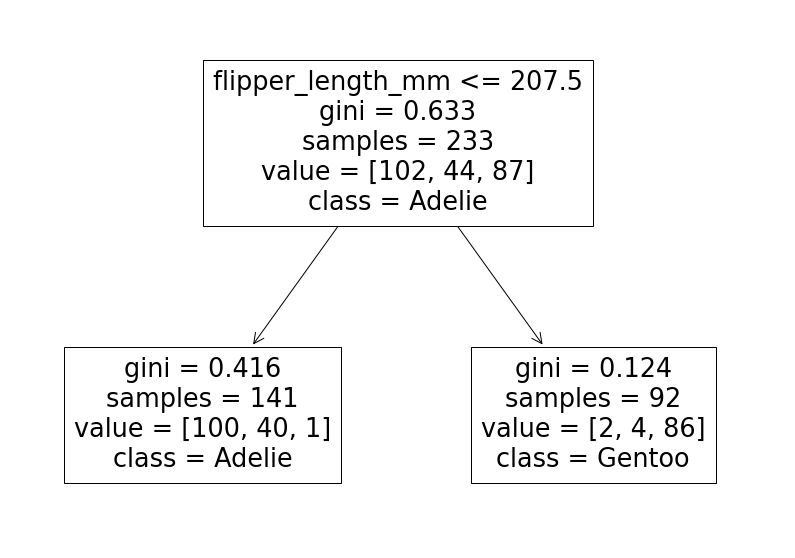

In [57]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(14,10))

plot_tree(model, 
          ax=ax, 
          feature_names = feature_columns, 
          class_names = y.unique());

## Choosing a different model 

What happens when we're interested in a model other than the decision tree? 

That's actually really easy. You simply replace the chosen model with another and the rest of the pipeline can stay the same.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Uncomment the model that you want to try
# model = DecisionTreeClassifier()
# model = RandomForestClassifier()
# model = SVC()
# model = KNeighborsClassifier()

In [68]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(f'Model accuracy: {model.score(X_test, y_test)}')
print(report)

Model accuracy: 0.71
              precision    recall  f1-score   support

      Adelie       0.63      0.84      0.72        44
   Chinstrap       0.67      0.25      0.36        24
      Gentoo       0.88      0.88      0.88        32

    accuracy                           0.71       100
   macro avg       0.72      0.66      0.65       100
weighted avg       0.72      0.71      0.68       100



# Summary

Scikit-learn is an excellent, resourceful tool for machine learning in Python. We've seen how we can split a dataset with `train_test_split` into a train and test set, create and train a model, use the trained model to create predictions, and how to use the tools from `sklearn.metrics` to evaluate how good the model is. 